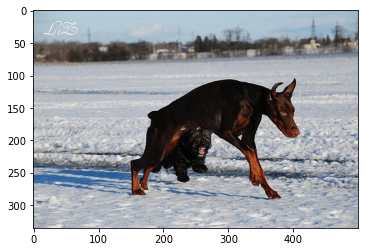

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from pickle import load
from keras.applications.xception import Xception #to get pre-trained model Xception
from keras_preprocessing.sequence import pad_sequences

model = Xception(include_top=False, pooling="avg")
imag = Image.open("test_2.png")
plt.imshow(imag)

In [2]:
from skimage.io import imread, imshow

img = imread('test_2.png')
img.shape, img

((335, 500, 3),
 array([[[154, 184, 195],
         [158, 186, 198],
         [157, 185, 197],
         ...,
         [153, 181, 193],
         [153, 179, 192],
         [155, 181, 194]],
 
        [[157, 185, 197],
         [159, 187, 199],
         [158, 186, 198],
         ...,
         [156, 182, 195],
         [155, 181, 194],
         [153, 179, 192]],
 
        [[156, 184, 196],
         [159, 187, 199],
         [160, 188, 200],
         ...,
         [155, 181, 194],
         [154, 180, 193],
         [152, 178, 191]],
 
        ...,
 
        [[170, 174, 183],
         [171, 175, 184],
         [175, 180, 186],
         ...,
         [178, 181, 190],
         [182, 185, 194],
         [168, 171, 180]],
 
        [[165, 171, 183],
         [169, 175, 187],
         [165, 172, 182],
         ...,
         [156, 159, 168],
         [164, 167, 176],
         [162, 165, 174]],
 
        [[154, 162, 175],
         [154, 162, 175],
         [157, 166, 175],
         ...,
         [15

In [7]:
imag = imag.resize((299,299))
imag = np.array(imag)
# for 4 channels images, we need to convert them into 3 channels
if imag.shape[2] == 4:
    imag = imag[..., :3]

imag = np.expand_dims(imag, axis=0)
imag = imag/127.5
imag = imag - 1.0
print(imag)
feature = model.predict(imag)

print(feature)
print(feature.shape)

[[[[0.22352941 0.45098039 0.5372549 ]
   [0.23137255 0.45098039 0.54509804]
   [0.24705882 0.46666667 0.56078431]
   ...
   [0.22352941 0.44313725 0.5372549 ]
   [0.20784314 0.41960784 0.51372549]
   [0.20784314 0.41176471 0.51372549]]

  [[0.23921569 0.45882353 0.55294118]
   [0.23921569 0.45882353 0.55294118]
   [0.25490196 0.46666667 0.56078431]
   ...
   [0.22352941 0.43529412 0.5372549 ]
   [0.22352941 0.42745098 0.52941176]
   [0.20784314 0.41176471 0.51372549]]

  [[0.23137255 0.45098039 0.54509804]
   [0.25490196 0.4745098  0.56862745]
   [0.2627451  0.4745098  0.57647059]
   ...
   [0.21568627 0.41960784 0.52156863]
   [0.20784314 0.41176471 0.51372549]
   [0.20784314 0.41176471 0.51372549]]

  ...

  [[0.33333333 0.36470588 0.42745098]
   [0.39607843 0.42745098 0.4745098 ]
   [0.41176471 0.45098039 0.48235294]
   ...
   [0.33333333 0.33333333 0.41960784]
   [0.38823529 0.41176471 0.48235294]
   [0.36470588 0.38823529 0.45882353]]

  [[0.31764706 0.35686275 0.45098039]
   [0.2